In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from datetime import timedelta, datetime
#import holidays

import matplotlib
import pickle
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.width', 500)

In [2]:
df_nan = pd.read_csv('../../../data/w_user_data/train_df_nan.csv')

In [3]:
df_nan[(round(df_nan['log_TARGET'], 1) <= -29.9)].count()

ID                        24685
TARGET                    24685
log_TARGET                24685
first_prediction              0
log_first_prediction          0
economic_class            24685
Retention_count_D0_3      24685
Retention_count_D4_7      24685
Retention_count_D8_11     24685
Retention_count_D12_15    24685
Avg_Lvl_Count_D0_3        24685
Avg_Lvl_Count_D4_7        24685
Avg_Lvl_Count_D8_11       24685
Avg_Lvl_Count_D12_15      24685
Avg_Duration_Lvl0_3       24685
Avg_Duration_Lvl4_7       24685
Avg_Duration_Lvl8_10      24685
Total_IAPRevenue          24685
Total_AdRevenue           24685
country                   24685
platform                  24685
device_category           24685
device_brand              24685
has_ios_att_permission    24685
ad_network                24685
target_class              24685
dtype: int64

In [4]:
df_nan['target_class'] = np.where(round(df_nan['log_TARGET'], 1) <= -29.9, 1, 0) # class 1 means TARGET is 0.0 

In [5]:
df_copy = df_nan.copy()

In [6]:
df_copy.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,economic_class,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,country,platform,device_category,device_brand,has_ios_att_permission,ad_network,target_class
0,9,0.000000,-30.000000,NaN,NaN,Nan,2,0,0,0,4.500000,0.000000,0.000000,0.000000,30.666667,51.000000,61.333333,0.000000,0.000000,Turkey,iOS,mobile,Apple,True,Nan,1
1,52,0.000000,-30.000000,NaN,NaN,Nan,1,0,0,0,3.500000,0.000000,0.000000,0.000000,66.666667,145.750000,83.000000,0.000000,0.000000,Other,Android,mobile,Samsung,False,Nan,1
2,80,0.000000,-30.000000,NaN,NaN,Nan,1,0,0,0,0.250000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,Brazil,Android,mobile,Samsung,False,Nan,1
3,110,0.000000,-30.000000,NaN,NaN,Nan,2,1,0,0,6.000000,1.000000,0.000000,0.000000,69.000000,122.750000,134.333333,0.000000,0.000000,Ecuador,Android,mobile,Samsung,False,Nan,1
4,135,0.000000,-30.000000,NaN,NaN,Nan,2,1,0,0,0.500000,0.000000,0.000000,0.000000,29.333333,0.000000,0.000000,0.000000,0.000000,Turkey,Android,mobile,Xiaomi,False,Nan,1


In [7]:
country_dummies = pd.get_dummies(df_copy.country , prefix = 'country', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, country_dummies], axis = 1)

platform_dummies = pd.get_dummies(df_copy.platform , prefix = 'platform', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, platform_dummies], axis = 1)

device_category_dummies = pd.get_dummies(df_copy.device_category , prefix = 'device_category', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, device_category_dummies], axis = 1)

device_brand_dummies = pd.get_dummies(df_copy.device_brand , prefix = 'device_brand', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, device_brand_dummies], axis = 1)

has_ios_att_permission_dummies = pd.get_dummies(df_copy.has_ios_att_permission , prefix = 'has_ios_att_permission', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, has_ios_att_permission_dummies], axis = 1)

ad_network_dummies = pd.get_dummies(df_copy.ad_network , prefix = 'ad_network', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, ad_network_dummies], axis = 1)

In [8]:
df_copy.drop(columns=['economic_class', 'country', 'platform', 'device_category', 'device_brand',
                     'has_ios_att_permission', 'ad_network'], inplace=True)

In [9]:
df_copy.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,target_class,country_Brazil,country_Canada,country_Chile,country_Colombia,country_Ecuador,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Mexico,country_Other,country_Peru,country_Spain,country_Turkey,country_United Kingdom,country_United States,country_Venezuela,platform_iOS,device_category_tablet,device_brand_Honor,device_brand_Huawei,device_brand_Motorola,device_brand_OPPO,device_brand_Other,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi,has_ios_att_permission_True,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int
0,9,0.000000,-30.000000,NaN,NaN,2,0,0,0,4.500000,0.000000,0.000000,0.000000,30.666667,51.000000,61.333333,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,52,0.000000,-30.000000,NaN,NaN,1,0,0,0,3.500000,0.000000,0.000000,0.000000,66.666667,145.750000,83.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,80,0.000000,-30.000000,NaN,NaN,1,0,0,0,0.250000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,110,0.000000,-30.000000,NaN,NaN,2,1,0,0,6.000000,1.000000,0.000000,0.000000,69.000000,122.750000,134.333333,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,135,0.000000,-30.000000,NaN,NaN,2,1,0,0,0.500000,0.000000,0.000000,0.000000,29.333333,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [10]:
df_nan = df_copy.copy()

In [11]:
df_nan.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,target_class,country_Brazil,country_Canada,country_Chile,country_Colombia,country_Ecuador,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Mexico,country_Other,country_Peru,country_Spain,country_Turkey,country_United Kingdom,country_United States,country_Venezuela,platform_iOS,device_category_tablet,device_brand_Honor,device_brand_Huawei,device_brand_Motorola,device_brand_OPPO,device_brand_Other,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi,has_ios_att_permission_True,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int
0,9,0.000000,-30.000000,NaN,NaN,2,0,0,0,4.500000,0.000000,0.000000,0.000000,30.666667,51.000000,61.333333,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,52,0.000000,-30.000000,NaN,NaN,1,0,0,0,3.500000,0.000000,0.000000,0.000000,66.666667,145.750000,83.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,80,0.000000,-30.000000,NaN,NaN,1,0,0,0,0.250000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,110,0.000000,-30.000000,NaN,NaN,2,1,0,0,6.000000,1.000000,0.000000,0.000000,69.000000,122.750000,134.333333,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,135,0.000000,-30.000000,NaN,NaN,2,1,0,0,0.500000,0.000000,0.000000,0.000000,29.333333,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


**Classifier**

In [12]:
X_cols = [col for col in df_nan.columns if col not in ['ID', 'TARGET', 'log_TARGET', 
                                                         'first_prediction', 'target_class', 'log_first_prediction'] ]

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [14]:
classifier = RandomForestClassifier(n_estimators=100, random_state = 128)

In [15]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_nan[X_cols]), columns=df_nan[X_cols].columns)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, df_nan.target_class, test_size=0.2, random_state=42)

In [17]:
classifier.fit(X_train, y_train)

train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)

f1_train = f1_score(y_train, train_predictions)
f1_test = f1_score(y_test, test_predictions)

cm = confusion_matrix(y_test, test_predictions)

In [18]:
print(train_acc)
print(test_acc)

print(f1_train)
print(f1_test)

0.9988828443753643
0.9702739459879541
0.9994178836273443
0.9846954086225868


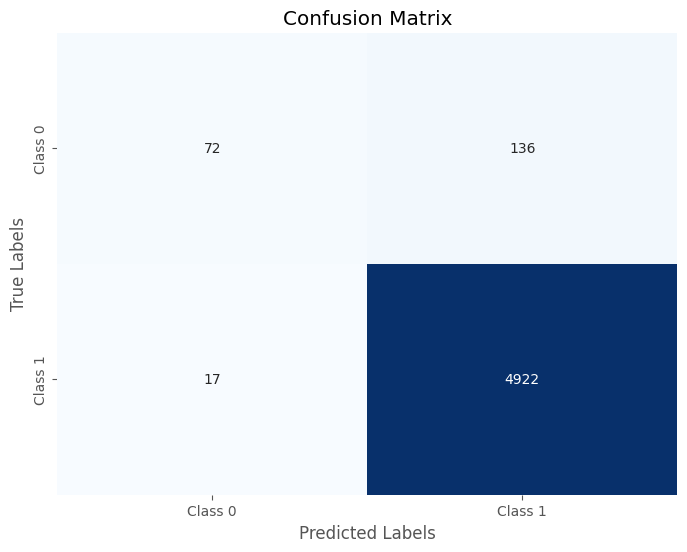

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
with open('../../../models/nan_classifier_w_user_data.pkl', 'wb') as file:
    pickle.dump(classifier, file)

**Regressor**

In [23]:
df_nan_reg = df_nan[df_nan['target_class'] == 0]

In [24]:
X_cols = [col for col in df_nan.columns if col not in ['ID', 'TARGET', 'log_TARGET', 
                                                         'first_prediction', 'target_class', 'log_first_prediction'] ]

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_nan_reg[X_cols]), columns=df_nan_reg[X_cols].columns)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, df_nan_reg.log_TARGET, test_size=0.2, random_state=42)

In [29]:
regressor.fit(X_train, y_train)

train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

In [30]:
print(rmse_test)
print(rmse_train)

2.356051539232346
0.9418183080422068


In [31]:
with open('../../../models/nan_regressor_w_user_data.pkl', 'wb') as file:
    pickle.dump(regressor, file)